## Desafío - Estimando curvas normales

### 2. Importe su conjunto de funciones
* Genere un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión pasada e impórtelo.
* Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra desu compañero

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append("ancilliary_funcs.py")  

In [3]:
from ancilliary_funcs import *

In [4]:
df=pd.read_csv("subsample_TZG_demo.csv").drop("Unnamed: 0", axis = 1)

In [5]:
df.head(5)

undp_hdi ccodealp      ht_region    gle_cgdpc     imf_pop  wef_imort  \
0     0.678      VNM  SouthEastAsia    4147.5698   89.691002       18.4   
1     0.729      JAM      Caribbean    4668.7700    2.799000       14.4   
2     0.784      ATG      Caribbean   12257.7100         NaN        NaN   
3     0.754      BRA          LatAm    9815.2402  202.768997       12.9   
4     0.911      LIE     WesternDem  102243.5200         NaN        NaN   

   who_alc2000   who_tobt  wdi_exph  
0         4.09  23.700001  7.066778  
1         3.83  17.600000  5.361525  
2         8.56        NaN  5.541683  
3         7.32  16.100000  8.322834  
4          NaN        NaN       NaN

In [6]:
df.describe()

undp_hdi      gle_cgdpc     imf_pop   wef_imort  who_alc2000  \
count  91.000000      96.000000   71.000000   71.000000    89.000000   
mean    0.691901   14525.414482   31.416690   25.421614     5.046854   
std     0.152476   19060.459506   53.502838   24.960332     3.953040   
min     0.351000     644.539980    0.011000    1.700000     0.000000   
25%     0.560000    2640.032525    1.183500    6.900000     1.340000   
50%     0.734000    9043.929650    7.167000   15.100000     4.200000   
75%     0.796500   16827.690000   36.221001   41.000000     8.560000   
max     0.938000  108481.130000  252.164993  117.400002    15.190000   

        who_tobt   wdi_exph  
count  65.000000  94.000000  
mean   23.593846   6.544134  
std    10.099256   2.752084  
min     4.700000   2.067386  
25%    16.299999   4.481987  
50%    23.700001   6.031131  
75%    30.000000   8.345808  
max    54.000000  16.536638

In [7]:
for llave, valor in df.iteritems():
    print(fetch_na_cases(df,llave,print_list=False))

Casos perdidos para undp_hdi:
Cantidad de Casos: 6
Porcentaje de la muestra 0.061855670103092786

None
Casos perdidos para ccodealp:
Cantidad de Casos: 0
Porcentaje de la muestra 0.0

None
Casos perdidos para ht_region:
Cantidad de Casos: 0
Porcentaje de la muestra 0.0

None
Casos perdidos para gle_cgdpc:
Cantidad de Casos: 1
Porcentaje de la muestra 0.010309278350515464

None
Casos perdidos para imf_pop:
Cantidad de Casos: 26
Porcentaje de la muestra 0.26804123711340205

None
Casos perdidos para wef_imort:
Cantidad de Casos: 26
Porcentaje de la muestra 0.26804123711340205

None
Casos perdidos para who_alc2000:
Cantidad de Casos: 8
Porcentaje de la muestra 0.08247422680412371

None
Casos perdidos para who_tobt:
Cantidad de Casos: 32
Porcentaje de la muestra 0.32989690721649484

None
Casos perdidos para wdi_exph:
Cantidad de Casos: 3
Porcentaje de la muestra 0.030927835051546393

None


### Desafío 3. Estime el puntaje Z
Estime el puntaje $z$ para las $10$ primeras y últimas observaciones de las variables con una menor cantidad de datos perdidos, para ello haga lo siguiente:
* Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde que para calcular el puntaje $z$ de una observación se utiliza la fórmula:
    
$$z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$
* Para ordenar los valores puedes utilizar la función **sort_values** del DataFrame analizado. 
*Indicación:* Lean la documentación asociada al argumento **by** para evitar conflictos en la sobreescritura.
* Asegúrense de eliminar las observaciones que tengan valores perdidos con **dropna**.
*Indicación:* Lean la documentación asociada al método **reset_index**.
* Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?

In [8]:
#df2 = pd.DataFrame({'col1': [1, 2, 23, np.nan, 5, 66, 88, 90, 87, 12, 1, 34], 'col2': [2, 1, 9, 8, 7, 4, 9, 8, 23, 45, 67, 11],'col3': [0, 1, 9, 4, 2, 3,9,7,4,5,7,1],})

def z_score(dataframe,var):
    colname = var + "_zscore"
    dataframe = dataframe.sort_values(by=[var]).dropna()
    tmp = dataframe[var]
    dataframe[colname]= (tmp-tmp.mean())/np.sqrt(tmp.var())
    return dataframe
    

In [9]:
for llave, valor in df[['who_alc2000','gle_cgdpc', 'wdi_exph']].iteritems():
    df = z_score(df,llave)  

In [10]:
resultado = df[['who_alc2000_zscore','gle_cgdpc_zscore', 'wdi_exph_zscore']].iloc[np.r_[0:10, -10:0]]
resultado

who_alc2000_zscore  gle_cgdpc_zscore  wdi_exph_zscore
37           -1.189757         -0.653041        -1.621143
39           -1.350074         -0.832811        -1.491354
93           -1.124173          1.868799        -1.478210
15           -1.357361         -0.898958        -1.412642
53           -1.337929         -0.712595        -1.401949
83            1.001244         -0.412544        -1.201235
49           -0.784106         -0.669688        -1.149984
55           -1.262629          0.622879        -1.130567
5             0.656319         -0.870836        -1.086484
63           -1.357361         -0.872324        -1.046606
11           -0.431894         -0.557706         1.021492
45            0.476570          1.045968         1.054817
58           -0.096686         -0.754445         1.056361
74            0.998815          1.400800         1.121746
38            0.848214         -0.302564         1.485023
90            0.748623          1.628581         1.687858
41           -0.441610         -0.949975         1.761782
61           -1.061018         -0.952573         1.872340
78            1.433614          1.113197         1.934348
84            0.974524          2.140568         1.980309

### Desafío 4: Estime el puntaje $z$ de las regiones
Para ello, modifique la función para generar dotplots de la clase pasada, donde deberá agregar una opción al argumento *statistic* para calcular el puntaje $z$ y su promedio de $z$ por agrupación.

In [11]:
from scipy.stats import zscore

def dotplot(df, plot_var, plot_by, global_stat = False, statistic = 'mean'):
    tmp_df = df.loc[:, [plot_by, plot_var]]

    if statistic is 'mean':
        tmp_group_stat = tmp_df.groupby(plot_by)[plot_var].mean()
    if statistic is 'median':
        tmp_group_stat = tmp_df.groupby(plot_by)[plot_var].median()
    if statistic is 'zscore':
        zscore_colname = plot_var + '_zscore'
        tmp_df = df.loc[:, [plot_by, zscore_colname]]
        tmp_group_stat = tmp_df.groupby(plot_by)[zscore_colname].mean()

    plt.plot(tmp_group_stat.values, tmp_group_stat.index, 'o', color='grey')

    if global_stat is True and  statistic is 'mean':
        plt.axvline(df[plot_var].mean(), color='tomato', linestyle='--')
    if global_stat is True and statistic is 'median':
        plt.axvline(df[plot_var].median(), color='tomato', linestyle='--')
    if global_stat is True and statistic is 'zscore':
        plt.axvline(df[zscore_colname].mean(), color='tomato', linestyle='--')

In [12]:
dotplot(df, plot_var = 'who_alc2000', plot_by = 'ht_region', global_stat = True, statistic = 'zscore')

### Desafío 5: Genere un método que devuelva un gráfico comparando dos curvas de densidad
* El método debe contener los siguientes argumentos:
    * *df1* : Tabla de datos 1.
    * *df2* : Tabla de datos 2.
    * *variable* : Variable a contrastar.
    * *log* : Booleano. Si es True transformar la variable al logaritmo. Por defecto debe ser False .
* Grafique las curvas para *imf_pop* , *gle_cgdpc* y *undp_hdi*. ¿En qué casos es necesario utilizar logaritmos?.¿Por qué?.
*Indicaciones :* 
* Use la base de datos global y la suya de la clase anterior para contrastar con el dataframe muestra de su compañero.
* Cuidado con el *$log(0)$*

In [13]:
import seaborn as sns
df2 = pd.read_csv("subsample_jrc.csv")
df_global = pd.read_csv("qog_std_cs_jan18.csv")
def comparacion_curvas( df1, df2, variable, log = False):
    tmp1 = df1[variable].dropna()
    tmp2 = df2[variable].dropna()
    if log is True:
        log_var1 = np.log(tmp1)
        log_var2 = np.log(tmp2)
        sns.distplot(log_var1)
        sns.distplot(log_var2)
    else: 
        sns.distplot(tmp1)
        sns.distplot(tmp2)
    

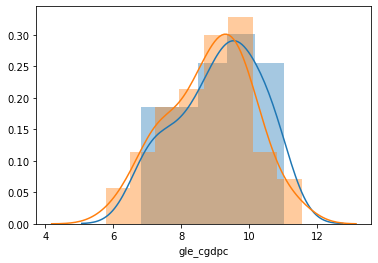

In [14]:
comparacion_curvas(df,df2, 'gle_cgdpc', True)

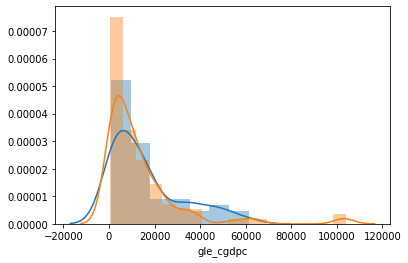

In [15]:
comparacion_curvas(df,df2, 'gle_cgdpc', False)

R: Para las variables 'imf_pop' y 'gle_cgdpc' en las cuales se observa un fuerte sesgo en los valores bajos, se pueden corregir mediante el uso de la distribución log-normal. Lo que ocurre es que al corregir la variable se puede observar una distribución que se aproxima más a la normal